# Clusterizando Jogadores de Futebol

Este projeto tem como objetivo aplicar técnicas de **Machine Learning** para clusterizar jogadores de futebol com base em seus atributos disponíveis no jogo *Football Manager*. A ideia central é explorar como modelos de aprendizado não supervisionado, como o **K-Means**, podem identificar grupos de jogadores semelhantes em termos de características físicas, técnicas e mentais.

O trabalho segue a lógica de um **scout orientado por dados**, inspirado em conceitos como *Moneyball* e uso de **Big Data** no futebol.  
Com isso, podemos responder perguntas como:
- Quais jogadores têm perfis semelhantes a uma estrela consolidada?
- Quais grupos de jogadores compartilham atributos próximos?
- Como identificar talentos de forma mais eficiente e objetiva?

Além disso, o estudo serve como exercício de **Data Analytics e Data Science aplicado ao esporte**, unindo análise estatística, pré-processamento de dados, e visualização de resultados.


## Importando a base

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
# Importando a base de dados
df = pd.read_csv('base-atributos.csv')
df.shape


C:\Users\Mário\AppData\Local\Temp\ipykernel_30576\2232628223.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('base-atributos.csv')


(503787, 86)

## Pré-processamento e Edição da base

In [3]:
# Conhecendo a base
df.head()

,UID,Newgen,Rec,Inf,Name,Best Role,Position,Club,Based,Division,Nat,Height,Weight,Preferred Foot,Age,Salary,Transfer Value,AP,CA,PA,Personality,Style,Media Description,Best Pos,Injury Risk,Acc,Aer,Agg,Agi,Ant,Bal,Bra,Cmd,Com,Cmp,Cnt,Cor,Cro,Dec,Det,Dri,Ecc,Fin,Fir,Fla,Fre,Han,Hea,Jum,Kic,Ldr,Lon,L Th,Mar,Nat.1,OtB,1v1,Pac,Pas,Pen,Pos,Pun,Ref,TRO,Sta,Str,Tck,Tea,Tec,Thr,Vis,Wor,Ada,Amb,Cons,Cont,Dirt,Imp M,Inj Pr,Loy,Pres,Prof,Spor,Temp,Vers,Expires
0,7458500,No,- - -,Wnt,Lionel Messi,Attacking Midfielder,"AM (RC), ST (C)",Inter Miami,U.S.A. (MLS),Major League Soccer,ARG,"1,69 m",67 kg,Left,37.0,"$115,000 p/m","$5,2M - $8,8M","$8,5M",185.0,200.0,Driven,Creative,Legendary winger,AM (C),Low,16.0,3.0,7.0,15.0,16.0,18.0,10.0,1.0,2.0,16.0,13.0,15.0,15.0,18.0,20.0,20.0,2.0,17.0,19.0,20.0,18.0,2.0,10.0,6.0,3.0,14.0,16.0,4.0,4.0,16.0,14.0,2.0,15.0,19.0,17.0,5.0,3.0,2.0,1.0,14.0,9.0,7.0,14.0,20.0,3.0,20.0,9.0,17.0,18.0,16.0,5.0,9.0,18.0,6.0,17.0,19.0,17.0,15.0,14.0,12.0,2025-12-31 00:00:00
1,85139014,No,- - -,NaN,Kylian Mbappé,Advanced Forward,"AM (RL), ST (C)",R. Madrid,Spain (La Liga Santander),La Liga Santander,FRA,"1,78 m",73 kg,Right,26.0,"$1,731,000 p/m",$289M - $364M,$302M,188.0,197.0,Driven,Technical,Elite striker,ST (C),Low,20.0,1.0,6.0,16.0,17.0,14.0,12.0,1.0,3.0,17.0,14.0,13.0,12.0,15.0,18.0,18.0,4.0,17.0,18.0,18.0,11.0,2.0,8.0,8.0,2.0,13.0,15.0,3.0,4.0,15.0,17.0,2.0,20.0,15.0,18.0,3.0,3.0,2.0,4.0,14.0,11.0,4.0,10.0,17.0,3.0,15.0,12.0,15.0,20.0,15.0,8.0,7.0,16.0,7.0,14.0,16.0,16.0,12.0,13.0,14.0,2029-06-30 00:00:00
2,735216,No,- - -,NaN,Cristiano Ronaldo,Poacher,ST (C),Al-Nassr (KSA),Saudi Arabia (Saudi Pro League),Saudi Professional League,POR,"1,87 m",84 kg,Right,39.0,"$5,414,000 p/m",Not for Sale,$375M,160.0,196.0,Perfectionist,Intelligent,Elite striker,ST (C),Low,12.0,1.0,6.0,11.0,17.0,13.0,13.0,1.0,4.0,15.0,10.0,10.0,11.0,12.0,20.0,13.0,2.0,18.0,15.0,17.0,13.0,3.0,18.0,16.0,2.0,19.0,15.0,5.0,3.0,20.0,18.0,2.0,13.0,13.0,20.0,4.0,1.0,1.0,1.0,13.0,15.0,5.0,7.0,17.0,1.0,13.0,7.0,17.0,20.0,13.0,16.0,12.0,17.0,6.0,5.0,17.0,20.0,5.0,7.0,9.0,2027-06-30 00:00:00
3,29179241,No,- - -,NaN,Erling Haaland,Advanced Forward,ST (C),Man City,England (Premier League),Premier League,NOR,"1,95 m",94 kg,Left,24.0,"$1,841,000 p/m",Not for Sale,$375M,188.0,195.0,Driven,Physical,Elite striker,ST (C),Low,17.0,1.0,15.0,16.0,19.0,17.0,15.0,1.0,3.0,18.0,15.0,7.0,10.0,15.0,20.0,14.0,3.0,18.0,16.0,16.0,13.0,2.0,15.0,18.0,1.0,13.0,13.0,5.0,6.0,19.0,18.0,2.0,19.0,13.0,17.0,7.0,1.0,1.0,1.0,14.0,17.0,7.0,14.0,15.0,1.0,14.0,13.0,16.0,20.0,16.0,11.0,9.0,14.0,10.0,15.0,18.0,17.0,10.0,12.0,10.0,2032-06-30 00:00:00
4,8718372,No,- - -,NaN,Manuel Neuer,Sweeper Keeper,GK,FC Bayern,Germany (Bundesliga),Bundesliga,GER,"1,93 m",93 kg,Right,38.0,"$1,513,000 p/m",Not for Sale,$375M,162.0,193.0,Driven,Distributor,World class goalkeeper,GK,NaN,9.0,15.0,12.0,14.0,13.0,14.0,14.0,15.0,14.0,18.0,13.0,2.0,6.0,14.0,18.0,12.0,18.0,7.0,13.0,12.0,8.0,14.0,10.0,18.0,18.0,17.0,7.0,12.0,9.0,19.0,13.0,15.0,10.0,16.0,13.0,16.0,8.0,15.0,20.0,12.0,16.0,11.0,12.0,13.0,17.0,16.0,12.0,8.0,16.0,16.0,13.0,4.0,17.0,12.0,18.0,20.0,15.0,12.0,18.0,5.0,2026-06-30 00:00:00


Alterando os nomes das colunas para maior clareza

In [4]:

# Dicionário de mapeamento: coluna_original -> novo_nome
col_rename = {
    "UID": "Unique ID",
    "Newgen": "Newgen",
    "Rec": "Scout recommendation",
    "Inf": "Player Status Information",
    "Name": "Name",
    "Best Role": "Best Role",
    "Position": "Position",
    "Club": "Club",
    "Based": "Based",
    "Division": "Division",
    "Nat": "Nationality",
    "Height": "Height",
    "Weight": "Weight",
    "Preferred Foot": "Preferred Foot",
    "Age": "Age",
    "Salary": "Salary",
    "Transfer Value": "Transfer Value",
    "AP": "Asking Price",
    "CA": "Current Ability",
    "PA": "Potential Ability",
    "Best Pos": "Best Pos",
    "Injury Risk": "Injury Risk",
    "Acc": "Acceleration",
    "Aer": "Aerial Reach",
    "Agg": "Aggression",
    "Agi": "Agility",
    "Ant": "Anticipation",
    "Bal": "Balance",
    "Bra": "Bravery",
    "Cmd": "Command Of Area",
    "Com": "Communication",
    "Cmp": "Composure",
    "Cnt": "Concentration",
    "Cor": "Corners",
    "Cro": "Crossing",
    "Dec": "Decisions",
    "Det": "Determination",
    "Dri": "Dribbling",
    "Ecc": "Eccentricity",
    "Fin": "Finishing",
    "Fir": "First Touch",
    "Fla": "Flair",
    "Fre": "Free Kicks",
    "Han": "Handling",
    "Hea": "Heading",
    "Jum": "Jumping Reach",
    "Kic": "Kicking",
    "Ldr": "Leadership",
    "Lon": "Long Shots",
    "L Th": "Long Throws",
    "Mar": "Marking",
    "Nat.1": "Natural Fitness",
    "OtB": "Off The Ball",
    "1v1": "One On Ones",
    "Pac": "Pace",
    "Pas": "Passing",
    "Pen": "Penalty Taking",
    "Pos": "Positioning",
    "Pun": "Punching (Tendency)",
    "Ref": "Reflexes",
    "TRO": "Rushing Out (Tendency)",
    "Sta": "Stamina",
    "Str": "Strength",
    "Tck": "Tackling",
    "Tea": "Teamwork",
    "Tec": "Technique",
    "Thr": "Throwing",
    "Vis": "Vision",
    "Wor": "Work Rate",
    "Ada": "Adaptability",
    "Amb": "Ambition",
    "Cons": "Consistency",
    "Cont": "Controversy",
    "Dirt": "Dirtiness",
    "Imp M": "Important Matches",
    "Inj Pr": "Injury Proneness",
    "Loy": "Loyalty",
    "Pres": "Pressure",
    "Prof": "Professionalism",
    "Spor": "Sportsmanship",
    "Temp": "Temperament",
    "Vers": "Versatility",
    "Expires": "Contract Expiry"
}

# Aplicar o rename
df = df.rename(columns=col_rename)



In [5]:
# Removendo colunas irrelevantes
df = df.drop(['Scout recommendation', 'Player Status Information', 'Injury Risk'], axis=1)


In [6]:
# Removendo jogadores que são Newgens (gerados pelo jogo)
df = df[df['Newgen'] == 'No']
df = df.drop('Newgen', axis=1)  # Removendo a coluna após a filtragem
df.shape

(474079, 82)

O volume de jogadores caiu de forma relevante excluindo jogadores gerados pelo jogo, que não é o foco da pesquisa

### Tratamento


In [7]:
# Tratando a coluna Height - convertendo para número (metros)
df['Height'] = df['Height'].str.replace(' m', '').str.replace(',', '.').astype(float)

In [8]:
# Tratando a coluna Weight - convertendo para número (kg)
df['Weight'] = df['Weight'].str.replace(' kg', '').astype(float)

In [9]:
# Tratando a coluna Salary - convertendo para número (removendo símbolos monetários e vírgulas)
df['Salary'] = df['Salary'].str.replace('$','').str.replace('€','').str.replace(',','').str.replace(' p/m','')
# Substituindo '-' por 0 antes de converter para float
df['Salary'] = df['Salary'].replace('-', '0').astype(float)

# Renomeando a coluna Salary para Salary p/m
df = df.rename(columns={'Salary': 'Salary p/m'})

In [10]:
# Tratando a coluna Contract Expiry - removendo horário
df['Contract Expiry'] = df['Contract Expiry'].apply(lambda x: x.split(' ')[0] if x != '-' else x)


In [11]:
# Tratando valores com 'K' na coluna Asking Price
df['Asking Price'] = df['Asking Price'].apply(lambda x:
    float(x.replace('$','').replace('€','').replace(',','.').replace('M','')) * 1000000 
    if 'M' in str(x)
    else float(x.replace('$','').replace('€','').replace(',','.').replace('K','')) * 1000 
    if 'K' in str(x)
    else float(x.replace('$','').replace('€','').replace(',','').replace('-','0'))
)

In [12]:
# Substituindo NaN por 0 na coluna Salary p/m
df['Salary p/m'] = df['Salary p/m'].fillna(0)


In [13]:
# Preenchendo o restante dos valores NaN com '-'
df = df.fillna('-')


In [14]:
# Verificando valores nulos
print("\nQuantidade de valores nulos por coluna:")
print(df.isnull().sum())


Quantidade de valores nulos por coluna:
Unique ID                 0
Name                      0
Best Role                 0
Position                  0
Club                      0
Based                     0
Division                  0
Nationality               0
Height                    0
Weight                    0
Preferred Foot            0
Age                       0
Salary p/m                0
Transfer Value            0
Asking Price              0
Current Ability           0
Potential Ability         0
Personality               0
Style                     0
Media Description         0
Best Pos                  0
Acceleration              0
Aerial Reach              0
Aggression                0
Agility                   0
Anticipation              0
Balance                   0
Bravery                   0
Command Of Area           0
Communication             0
Composure                 0
Concentration             0
Corners                   0
Crossing                  0
Decisio

In [15]:
# Verificando os tipos de dados de cada coluna
print("\nTipos de dados de cada coluna:")
print(df.dtypes)



Tipos de dados de cada coluna:
Unique ID                  object
Name                       object
Best Role                  object
Position                   object
Club                       object
Based                      object
Division                   object
Nationality                object
Height                    float64
Weight                    float64
Preferred Foot             object
Age                       float64
Salary p/m                float64
Transfer Value             object
Asking Price              float64
Current Ability           float64
Potential Ability         float64
Personality                object
Style                      object
Media Description          object
Best Pos                   object
Acceleration              float64
Aerial Reach              float64
Aggression                float64
Agility                   float64
Anticipation              float64
Balance                   float64
Bravery                   float64
Command Of Area 

In [16]:
df.describe()

,Height,Weight,Age,Salary p/m,Asking Price,Current Ability,Potential Ability,Acceleration,Aerial Reach,Aggression,Agility,Anticipation,Balance,Bravery,Command Of Area,Communication,Composure,Concentration,Corners,Crossing,Decisions,Determination,Dribbling,Eccentricity,Finishing,First Touch,Flair,Free Kicks,Handling,Heading,Jumping Reach,Kicking,Leadership,Long Shots,Long Throws,Marking,Natural Fitness,Off The Ball,One On Ones,Pace,Passing,Penalty Taking,Positioning,Punching (Tendency),Reflexes,Rushing Out (Tendency),Stamina,Strength,Tackling,Teamwork,Technique,Throwing,Vision,Work Rate,Adaptability,Ambition,Consistency,Controversy,Dirtiness,Important Matches,Injury Proneness,Loyalty,Pressure,Professionalism,Sportsmanship,Temperament,Versatility
count,474079.000000,474079.000000,474079.000000,4.740790e+05,4.740790e+05,474079.000000,474079.000000,474079.00000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000,474079.000000
mean,1.802640,72.453912,26.057765,2.762277e+03,9.348446e+06,60.026553,78.063162,10.86512,2.973901,9.914120,10.518614,8.094818,6.924319,7.210475,2.768912,2.699379,7.267833,7.248144,4.724059,5.832891,10.041194,10.164802,6.145944,2.555950,6.147359,8.462041,7.216302,4.662356,3.014685,6.631253,8.249809,2.798586,8.160889,5.329249,3.607935,6.533369,11.791092,7.119438,2.667819,10.583616,7.900757,3.961321,7.530698,2.863972,3.025941,2.861719,8.317027,6.313112,6.946840,7.160777,7.686356,2.585590,6.614425,8.483192,13.154521,10.986283,10.972446,4.843874,8.831243,8.244793,8.863012,11.006136,10.920344,11.074002,10.527931,14.165344,10.655760
std,0.072506,7.141592,5.732951,2.847568e+04,5.799658e+07,24.821998,27.244139,2.48334,2.813491,3.115182,2.382639,2.659593,2.930866,3.333179,2.269302,2.098146,2.766597,2.729134,2.614417,3.557926,2.731099,4.294146,3.812569,1.792077,3.884135,3.558897,3.362151,2.782530,2.897007,3.763067,3.510674,2.382811,3.634144,3.073341,2.751792,3.445127,2.729542,3.469700,2.071499,2.420152,3.107979,3.050117,3.083242,2.569566,2.940698,2.562018,3.353984,3.201341,4.075398,2.896301,3.554399,1.902289,3.224987,3.040013,4.061855,1.731432,3.683065,2.611028,3.062014,4.238126,3.029277,1.717742,1.613079,1.694714,2.207245,3.540678,2.709635
min,1.500000,50.000000,14.000000,0.000000e+00,0.000000e+00,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,68.000000,22.000000,0.000000e+00,0.000000e+00,42.000000,60.000000,9.00000,1.000000,7.000000,9.000000,6.000000,5.000000,5.000000,1.000000,1.000000,5.000000,5.000000,3.000000,3.000000,8.000000,7.000000,3.000000,1.000000,3.000000,6.000000,5.000000,2.000000,1.000000,4.000000,6.000000,1.000000,5.000000,3.000000,1.000000,4.000000,10.000000,4.000000,1.000000,9.000000,6.000000,1.000000,5.000000,1.000000,1.000000,1.000000,6.000000

### Padronização

In [17]:
# Criando colunas para mapear as posições
df['GK'] = df['Position'].str.contains('GK').astype(int)
df['D'] = df['Position'].str.contains('D(?!M)').astype(int)  # D mas não DM
df['WB'] = df['Position'].str.contains('WB').astype(int)
df['DM'] = df['Position'].str.contains('DM').astype(int)
df['M'] = df['Position'].str.contains('M(?!$)').astype(int)  # M mas não AM
df['AM'] = df['Position'].str.contains('AM').astype(int)
df['ST'] = df['Position'].str.contains('ST').astype(int)

# Preenchendo valores NaN com 0
posicoes = ['GK', 'D', 'WB', 'DM', 'M', 'AM', 'ST']
df[posicoes] = df[posicoes].fillna(0)

In [18]:
# Criando colunas para mapear os lados do campo
df['Pos_Left'] = df['Position'].str.contains('L(?![B])').astype(int)   # L mas não LB
df['Pos_Center'] = df['Position'].str.contains('C').astype(int)
df['Pos_Right'] = df['Position'].str.contains('R(?![B])').astype(int)  # R mas não RB

# Preenchendo valores NaN com 0
lados = ['Pos_Right', 'Pos_Center', 'Pos_Left'] 
df[lados] = df[lados].fillna(0)


In [19]:
# Criando colunas para mapear o pé preferido de forma única
df['PF_Right'] = ((df['Preferred Foot'].str.contains('Right')) & (df['Preferred Foot'] != 'Right Only')).astype(int)
df['PF_Right_Only'] = (df['Preferred Foot'] == 'Right Only').astype(int)
df['PF_Left'] = ((df['Preferred Foot'].str.contains('Left')) & (df['Preferred Foot'] != 'Left Only')).astype(int)
df['PF_Left_Only'] = (df['Preferred Foot'] == 'Left Only').astype(int)
df['PF_Either'] = (df['Preferred Foot'] == 'Either').astype(int)

# Preenchendo valores NaN com 0
pe_preferido = ['PF_Right', 'PF_Right_Only', 'PF_Left', 'PF_Left_Only', 'PF_Either']
df[pe_preferido] = df[pe_preferido].fillna(0)




### Normalização

In [20]:
# Lista de atributos para normalizar
atributos = ['Acceleration', 'Aerial Reach', 'Aggression', 'Agility', 'Anticipation', 
             'Balance', 'Bravery', 'Command Of Area', 'Communication', 'Composure',
             'Concentration', 'Corners', 'Crossing', 'Decisions', 'Determination',
             'Dribbling', 'Eccentricity', 'Finishing', 'First Touch', 'Flair',
             'Free Kicks', 'Handling', 'Heading', 'Jumping Reach', 'Kicking',
             'Leadership', 'Long Shots', 'Long Throws', 'Marking', 'Natural Fitness',
             'Off The Ball', 'One On Ones', 'Pace', 'Passing', 'Penalty Taking',
             'Positioning', 'Punching (Tendency)', 'Reflexes', 'Rushing Out (Tendency)',
             'Stamina', 'Strength', 'Tackling', 'Teamwork', 'Technique', 'Throwing',
             'Vision', 'Work Rate', 'Adaptability', 'Ambition', 'Consistency',
             'Controversy', 'Dirtiness', 'Important Matches', 'Injury Proneness',
             'Loyalty', 'Pressure', 'Professionalism', 'Sportsmanship', 'Temperament',
             'Versatility']

# Importando StandardScaler
from sklearn.preprocessing import StandardScaler

# Criando o scaler
scaler = StandardScaler()

# Criando novas colunas normalizadas
df_norm = pd.DataFrame(scaler.fit_transform(df[atributos]), columns=[col + '_norm' for col in atributos])

# Concatenando as novas colunas normalizadas com o DataFrame original
df = pd.concat([df, df_norm], axis=1)





In [21]:
scaler = StandardScaler()

# Colunas a normalizar
cols_extra = ['Height','Weight','Age']

# Criar colunas novas
df_norm_extra = scaler.fit_transform(df[cols_extra])
df_norm_extra = pd.DataFrame(df_norm_extra, columns=[c + "_norm" for c in cols_extra], index=df.index)

# Concatenar com o df
df = pd.concat([df, df_norm_extra], axis=1)


In [22]:
# Removendo linhas onde Unique ID é NaN
df = df.dropna(subset=['Unique ID'])


### EDA

In [23]:
# Ordenando por Current Ability e mostrando os 10 melhores jogadores
top_10_ca = df.sort_values(by='Current Ability', ascending=False).head(10)
print("\nTop 10 jogadores por Current Ability:\n")
print(top_10_ca[['Name', 'Current Ability', 'Best Role', 'Club']].to_string())




Top 10 jogadores por Current Ability:

                Name  Current Ability             Best Role         Club
5    Kevin De Bruyne            190.0               Mezzala       Napoli
3     Erling Haaland            188.0      Advanced Forward     Man City
1      Kylian Mbappé            188.0      Advanced Forward    R. Madrid
0       Lionel Messi            185.0  Attacking Midfielder  Inter Miami
22        Harry Kane            184.0    Deep Lying Forward    FC Bayern
7    Vinícius Júnior            184.0        Inside Forward    R. Madrid
17     Mohamed Salah            181.0                Winger    Liverpool
32  Thibaut Courtois            181.0            Goalkeeper    R. Madrid
46             Rodri            180.0             Half Back     Man City
51           Ederson            180.0        Sweeper Keeper   Fenerbahçe


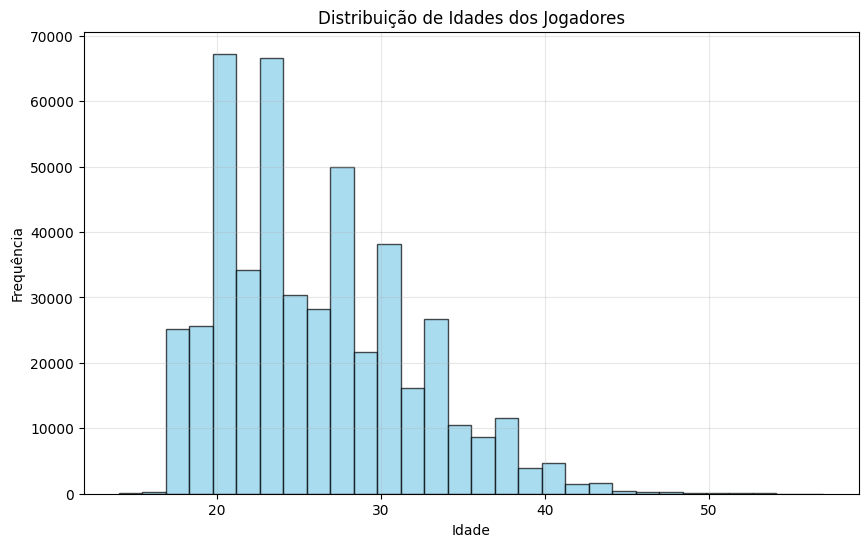

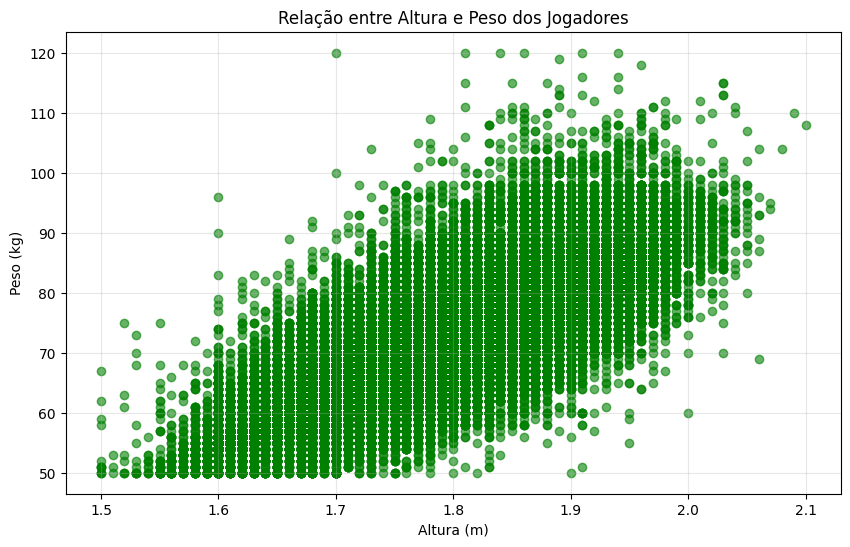

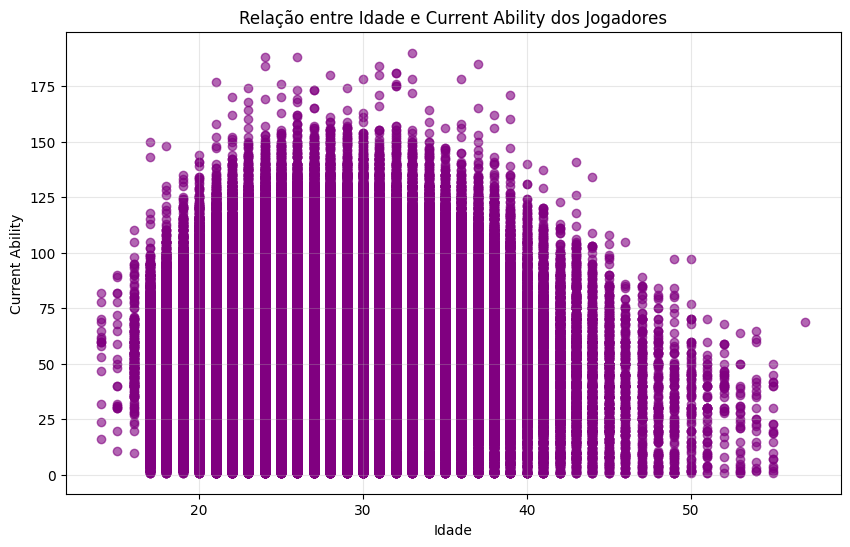

In [24]:
# 1. Análise de distribuição de idades
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuição de Idades dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Análise de altura vs peso
plt.figure(figsize=(10, 6))
plt.scatter(df['Height'], df['Weight'], alpha=0.6, color='green')
plt.title('Relação entre Altura e Peso dos Jogadores')
plt.xlabel('Altura (m)')
plt.ylabel('Peso (kg)')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Análise de Idade vs Current Ability
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Current Ability'], alpha=0.6, color='purple')
plt.title('Relação entre Idade e Current Ability dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Current Ability')
plt.grid(True, alpha=0.3)
plt.show()


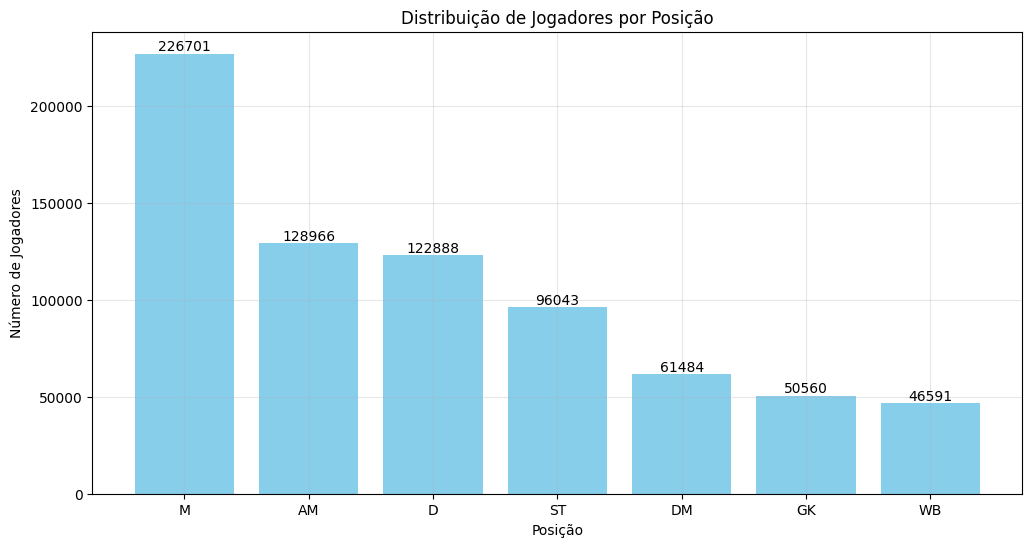

In [25]:
# Criando um dicionário para contar as posições
# Criando um dicionário para contar as posições
posicoes = {
    'GK': df['Position'].str.contains('GK').sum(),
    'D': df['Position'].str.contains('D ').sum(),  
    'WB': df['Position'].str.contains('WB').sum(),
    'DM': df['Position'].str.contains('DM').sum(),
    'M': df['Position'].str.contains('M ').sum(),
    'AM': df['Position'].str.contains('AM').sum(),
    'ST': df['Position'].str.contains('ST').sum()
}

# Ordenando o dicionário por valores em ordem decrescente
posicoes_ordenadas = dict(sorted(posicoes.items(), key=lambda x: x[1], reverse=True))

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(posicoes_ordenadas.keys(), posicoes_ordenadas.values(), color='skyblue')
plt.title('Distribuição de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Número de Jogadores')
plt.grid(True, alpha=0.3)

# Adicionando os valores em cima das barras
for i, (posicao, valor) in enumerate(posicoes_ordenadas.items()):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()



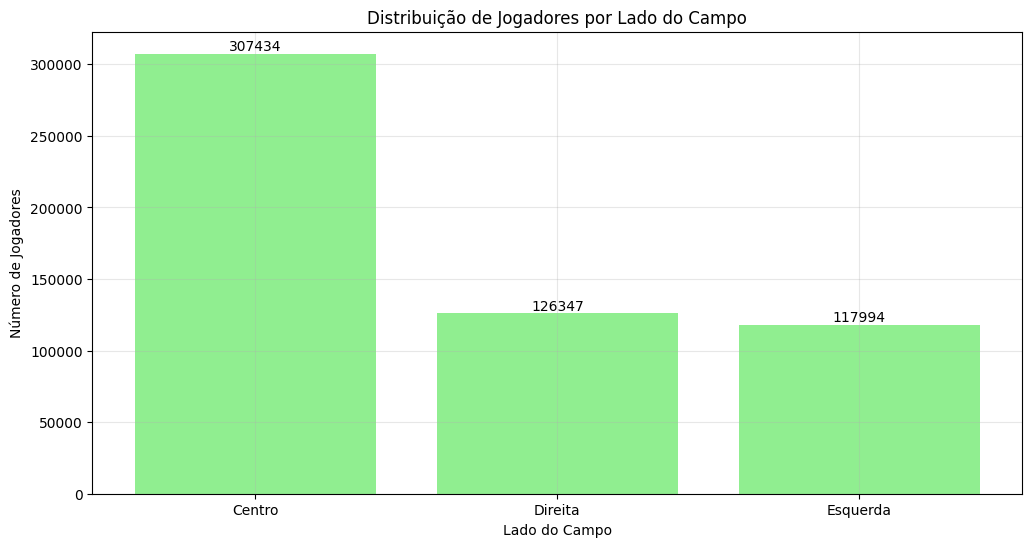

In [26]:
# Criando um dicionário para contar as posições por lado do campo
posicoes_lado = {
    'Esquerda': df['Position'].str.contains('L').sum(),
    'Centro': df['Position'].str.contains('C').sum(),
    'Direita': df['Position'].str.contains('R').sum()
}

# Ordenando o dicionário por valores em ordem decrescente
posicoes_lado_ordenadas = dict(sorted(posicoes_lado.items(), key=lambda x: x[1], reverse=True))

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(posicoes_lado_ordenadas.keys(), posicoes_lado_ordenadas.values(), color='lightgreen')
plt.title('Distribuição de Jogadores por Lado do Campo')
plt.xlabel('Lado do Campo')
plt.ylabel('Número de Jogadores')
plt.grid(True, alpha=0.3)

# Adicionando os valores em cima das barras
for i, (lado, valor) in enumerate(posicoes_lado_ordenadas.items()):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()


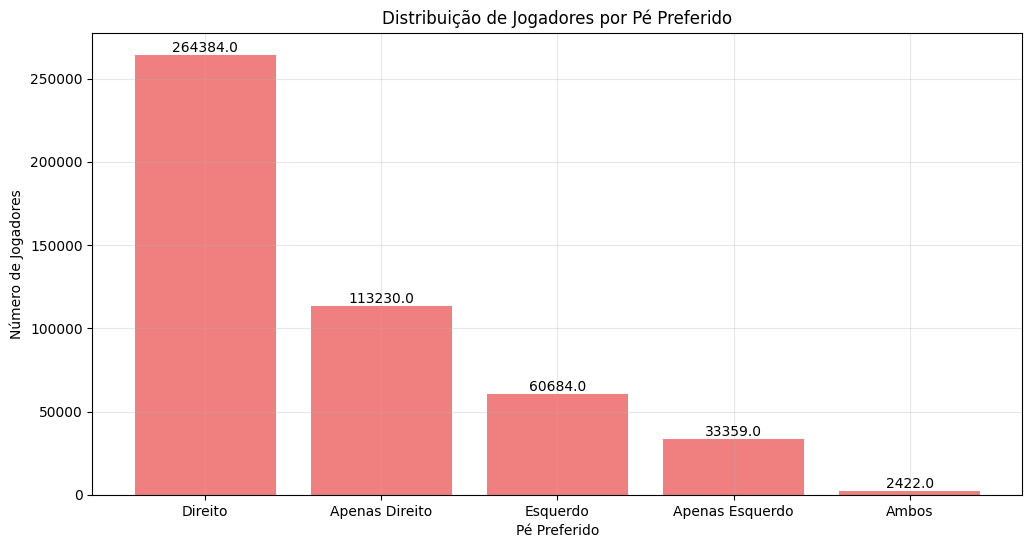

In [27]:
# Criando um dicionário para contar os pés preferidos
pes_preferidos = {
    'Direito': df['PF_Right'].sum(),
    'Apenas Direito': df['PF_Right_Only'].sum(), 
    'Esquerdo': df['PF_Left'].sum(),
    'Apenas Esquerdo': df['PF_Left_Only'].sum(),
    'Ambos': df['PF_Either'].sum()
}

# Ordenando o dicionário por valores em ordem decrescente
pes_preferidos_ordenados = dict(sorted(pes_preferidos.items(), key=lambda x: x[1], reverse=True))

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(pes_preferidos_ordenados.keys(), pes_preferidos_ordenados.values(), color='lightcoral')
plt.title('Distribuição de Jogadores por Pé Preferido')
plt.xlabel('Pé Preferido')
plt.ylabel('Número de Jogadores')
plt.grid(True, alpha=0.3)

# Adicionando os valores em cima das barras
for i, (pe, valor) in enumerate(pes_preferidos_ordenados.items()):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()


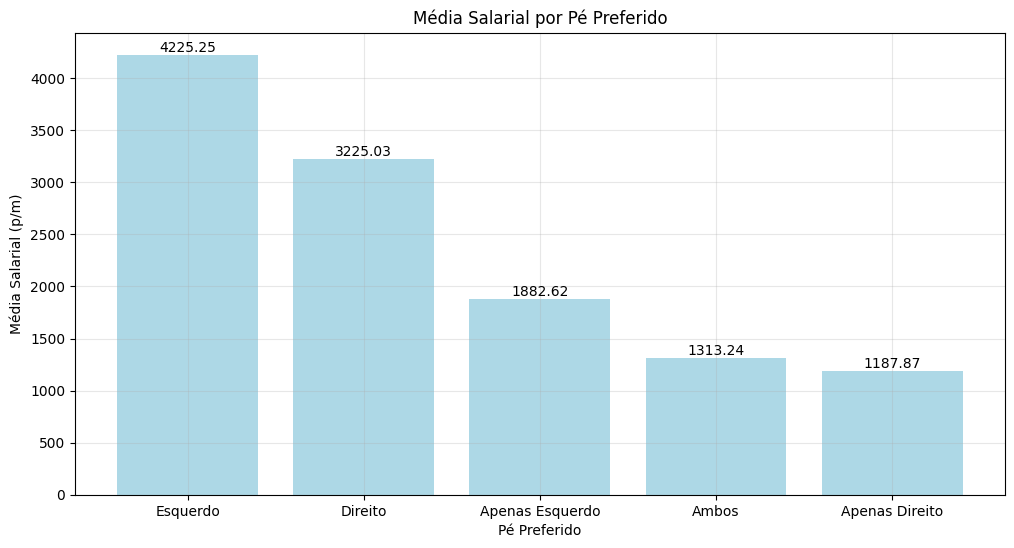

In [28]:
# Calculando a média salarial por pé preferido
media_salario_pes = {
    'Direito': df[df['PF_Right'] == 1]['Salary p/m'].mean(),
    'Apenas Direito': df[df['PF_Right_Only'] == 1]['Salary p/m'].mean(),
    'Esquerdo': df[df['PF_Left'] == 1]['Salary p/m'].mean(), 
    'Apenas Esquerdo': df[df['PF_Left_Only'] == 1]['Salary p/m'].mean(),
    'Ambos': df[df['PF_Either'] == 1]['Salary p/m'].mean()
}

# Ordenando o dicionário por valores em ordem decrescente
media_salario_pes_ordenado = dict(sorted(media_salario_pes.items(), key=lambda x: x[1], reverse=True))

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(media_salario_pes_ordenado.keys(), media_salario_pes_ordenado.values(), color='lightblue')
plt.title('Média Salarial por Pé Preferido')
plt.xlabel('Pé Preferido')
plt.ylabel('Média Salarial (p/m)')
plt.grid(True, alpha=0.3)

# Adicionando os valores em cima das barras
for i, (pe, valor) in enumerate(media_salario_pes_ordenado.items()):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.show()


In [29]:
df.head()

,Unique ID,Name,Best Role,Position,Club,Based,Division,Nationality,Height,Weight,Preferred Foot,Age,Salary p/m,Transfer Value,Asking Price,Current Ability,Potential Ability,Personality,Style,Media Description,Best Pos,Acceleration,Aerial Reach,Aggression,Agility,Anticipation,Balance,Bravery,Command Of Area,Communication,Composure,Concentration,Corners,Crossing,Decisions,Determination,Dribbling,Eccentricity,Finishing,First Touch,Flair,Free Kicks,Handling,Heading,Jumping Reach,Kicking,Leadership,Long Shots,Long Throws,Marking,Natural Fitness,Off The Ball,One On Ones,Pace,Passing,Penalty Taking,Positioning,Punching (Tendency),Reflexes,Rushing Out (Tendency),Stamina,Strength,Tackling,Teamwork,Technique,Throwing,Vision,Work Rate,Adaptability,Ambition,Consistency,Controversy,Dirtiness,Important Matches,Injury Proneness,Loyalty,Pressure,Professionalism,Sportsmanship,Temperament,Versatility,Contract Expiry,GK,D,WB,DM,M,AM,ST,Pos_Left,Pos_Center,Pos_Right,PF_Right,PF_Right_Only,PF_Left,PF_Left_Only,PF_Either,Acceleration_norm,Aerial Reach_norm,Aggression_norm,Agility_norm,Anticipation_norm,Balance_norm,Bravery_norm,Command Of Area_norm,Communication_norm,Composure_norm,Concentration_norm,Corners_norm,Crossing_norm,Decisions_norm,Determination_norm,Dribbling_norm,Eccentricity_norm,Finishing_norm,First Touch_norm,Flair_norm,Free Kicks_norm,Handling_norm,Heading_norm,Jumping Reach_norm,Kicking_norm,Leadership_norm,Long Shots_norm,Long Throws_norm,Marking_norm,Natural Fitness_norm,Off The Ball_norm,One On Ones_norm,Pace_norm,Passing_norm,Penalty Taking_norm,Positioning_norm,Punching (Tendency)_norm,Reflexes_norm,Rushing Out (Tendency)_norm,Stamina_norm,Strength_norm,Tackling_norm,Teamwork_norm,Technique_norm,Throwing_norm,Vision_norm,Work Rate_norm,Adaptability_norm,Ambition_norm,Consistency_norm,Controversy_norm,Dirtiness_norm,Important Matches_norm,Injury Proneness_norm,Loyalty_norm,Pressure_norm,Professionalism_norm,Sportsmanship_norm,Temperament_norm,Versatility_norm,Height_norm,Weight_norm,Age_norm
0,7458500,Lionel Messi,Attacking Midfielder,"AM (RC), ST (C)",Inter Miami,U.S.A. (MLS),Major League Soccer,ARG,1.69,67.0,Left,37.0,115000.0,"$5,2M - $8,8M",8500000.0,185.0,200.0,Driven,Creative,Legendary winger,AM (C),16.0,3.0,7.0,15.0,16.0,18.0,10.0,1.0,2.0,16.0,13.0,15.0,15.0,18.0,20.0,20.0,2.0,17.0,19.0,20.0,18.0,2.0,10.0,6.0,3.0,14.0,16.0,4.0,4.0,16.0,14.0,2.0,15.0,19.0,17.0,5.0,3.0,2.0,1.0,14.0,9.0,7.0,14.0,20.0,3.0,20.0,9.0,17.0,18.0,16.0,5.0,9.0,18.0,6.0,17.0,19.0,17.0,15.0,14.0,12.0,2025-12-31,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.067733,0.009276,-0.935458,1.880852,2.972331,3.778983,0.836897,-0.779497,-0.333332,3.156287,2.107578,3.930495,2.576535,2.914144,2.290376,3.633789,-0.310227,2.794098,2.961021,3.802242,4.793357,-0.350253,0.895214,-0.640849,0.084528,1.606738,3.472039,0.142477,-0.735349,1.541985,1.983044,-0.322385,1.824839,3.571213,4.274818,-0.820792,0.052938,-0.348877,-0.726662,1.694397,0.839301,0.013044,2.361368,3.464343,0.217848,4.150587,0.170002,0.946731,4.050823,1.365048,0.059795,0.055113,2.301776,-0.945115,3.489388,5.008844,3.496757,2.026088,-0.046698,0.496097,-1.553540,-0.763684,1.908659
1,85139014,Kylian Mbappé,Advanced Forward,"AM (RL), ST (C)",R. Madrid,Spain (La Liga Santander),La Liga Santander,FRA,1.78,73.0,Right,26.0,1731000.0,$289M - $364M,302000000.0,188.0,197.0,Driven,Technical,Elite striker,ST (C),20.0,1.0,6.0,16.0,17.0,14.0,12.0,1.0,3.0,17.0,14.0,13.0,12.0,15.0,18.0,18.0,4.0,17.0,18.0,18.0,11.0,2.0,8.0,8.0,2.0,13.0,15.0,3.0,4.0,15.0,17.0,2.0,20.0,15.0,18.0,3.0,3.0,2.0,4.0,14.0,11.0,4.0,10.0,17.0,3.0,15.0,12.0,15.0,20.0,15.0,8.0,7.0,16.0,7.0,14.0,16.0,16.0,12.0,13.0,14.0,2029-06-30,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.678469,-0.701585,-1.256467,2.300555,3.348328,2.414198,1.436926,-0.779497,0.143279,3.517742,2.473995,3.165505,1.733346,1.815684,1.824625,3.109208,0.805798,2.794098,2.680035,3.207384,2.277658,-0.350253,0.363732,-0.071157,-0.335145,1.331570,3.146660,-

## Clusterização com K-Means


## Passo 1: Seleção de Variáveis Normalizadas para Clusterização

Para realizar a clusterização, precisamos selecionar os atributos que servirão de base para o agrupamento dos jogadores. No caso deste projeto, usamos variáveis que já passaram por um processo de **normalização**, ou seja, foram escaladas para que estejam em uma mesma faixa de valores (tipicamente entre 0 e 1). Isso é fundamental para evitar que atributos com valores muito altos (ex: "Altura em cm") dominem a formação dos clusters em detrimento de outros (ex: "Agressividade").

In [30]:
cols_norm = [c for c in df.columns if c.endswith('_norm')]
X = df[cols_norm].copy()


## Passo 2: Separação entre Goleiros e Jogadores de Linha

Como os **goleiros** têm funções muito específicas e atributos técnicos distintos dos jogadores de linha, é importante separá-los antes de aplicar o algoritmo de clusterização.

Agrupar todos os jogadores juntos (zagueiros, atacantes, goleiros, etc.) resultaria em **clusters pouco interpretáveis** e **misturas irreais de perfis**.

In [31]:
def is_gk(row):
    return 'GK' in str(row['Position']) or 'GK' in str(row['Best Role'])

mask_gk = df.apply(is_gk, axis=1)
df_gk = df[mask_gk].copy()
df_out = df[~mask_gk].copy()

X_gk = X.loc[df_gk.index]
X_out = X.loc[df_out.index]


In [32]:
X_out = X_out.fillna(0.0)   # substitui NaN por 0
X_gk  = X_gk.fillna(0.0)


## Passo 3: Construção do Modelo de Similaridade (KNN)

Após normalizar os dados e separar os jogadores de linha dos goleiros, aplicamos o algoritmo `NearestNeighbors`, da biblioteca `sklearn`, para construir um sistema de **recomendação de jogadores semelhantes**.

Esse algoritmo não realiza a clusterização em si, mas permite que, dado um jogador, encontremos **os N jogadores mais parecidos com ele**, com base na **distância euclidiana** entre os vetores de atributos.


In [33]:
from sklearn.neighbors import NearestNeighbors

# Jogadores de linha
knn_out = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn_out.fit(X_out)

# Goleiros
knn_gk = NearestNeighbors(n_neighbors=10, metric='euclidean')
knn_gk.fit(X_gk)


NearestNeighbors(metric='euclidean', n_neighbors=10)

## Passo 4: Busca de Jogadores Semelhantes com KNN

Após o treinamento do modelo KNN, criamos uma função chamada `encontrar_jogadores_semelhantes` que recebe como entrada o **ID único de um jogador** e retorna uma lista com os jogadores mais similares a ele, com base nos atributos técnicos normalizados.

Essa função é a base para **recomendações de atletas semelhantes**, útil para scouting, comparação de perfis ou busca de substitutos no mercado.


In [34]:
def encontrar_jogadores_semelhantes(player_id, n=10, df_ref=df, X_ref=X_out, knn_model=knn_out):
    # Pegar índice do jogador
    idx = df_ref[df_ref['Unique ID'] == player_id].index[0]
    # Pegar vetor do jogador
    vec = X_ref.loc[idx].values.reshape(1, -1)
    # Rodar KNN
    distances, indices = knn_model.kneighbors(vec, n_neighbors=n+1)
    # Excluir o próprio jogador (primeira posição)
    neighbors_idx = indices[0][1:]
    return df_ref.iloc[neighbors_idx][['Unique ID','Name','Club','Nationality','Age','Best Role','Position']]


Busca de jogadores e seus IDs


In [37]:
def buscar_jogador_por_nome(nome, df_ref=df):
    """
    Busca jogadores pelo nome (case insensitive) e retorna ID e nome completo
    
    Parâmetros:
        nome (str): Parte do nome do jogador para buscar
        df_ref (DataFrame): DataFrame de referência para busca
        
    Retorna:
        DataFrame com ID e nome dos jogadores encontrados
    """
    # Converte nome para minúsculo para busca case insensitive
    mask = df_ref['Name'].str.lower().str.contains(nome.lower())
    resultado = df_ref[mask][['Unique ID', 'Name', 'Club', 'Current Ability', 'Potential Ability']]
    
    if len(resultado) == 0:
        print(f"Nenhum jogador encontrado com '{nome}' no nome")
        return None
        
    return resultado

# Exemplo de busca por nome de jogador
buscar_jogador_por_nome('Messi').head()


,Unique ID,Name,Club,Current Ability,Potential Ability
0,7458500,Lionel Messi,Inter Miami,185.0,200.0
2552,43315178,Junior Messias,Genoa,135.0,145.0
7543,19152301,Fabrício Messias,Democrata SL,115.0,135.0
14769,19219389,Messias,Goiás,118.0,127.0
17706,2000326402,Faustino Messina,Estudiantes (LP),81.0,125.0


## Passo 5: Exemplo Prático – Encontrando Jogadores Semelhantes ao Messi

Agora que temos o modelo de KNN treinado e a função de busca definida, podemos fazer consultas práticas.  
Neste exemplo, vamos buscar os **10 jogadores mais semelhantes a Lionel Messi**, com base nos atributos disponíveis e normalizados.


In [38]:
resultado = encontrar_jogadores_semelhantes(7458500, 10, df_out, X_out, knn_out)  # Messi
resultado


c:\Users\Mário\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,Unique ID,Name,Club,Nationality,Age,Best Role,Position
17,98028755,Mohamed Salah,Liverpool,EGY,32.0,Winger,"AM (RL), ST (C)"
1,85139014,Kylian Mbappé,R. Madrid,FRA,26.0,Advanced Forward,"AM (RL), ST (C)"
37,53095137,Martin Ødegaard,Arsenal,NOR,26.0,Advanced Playmaker,M/AM (C)
893,85071175,Wissam Ben Yedder,-,FRA,34.0,Advanced Forward,ST (C)
50,67086656,Antoine Griezmann,A. Madrid,FRA,33.0,Attacking Midfielder,"AM (RLC), ST (C)"
141,7456688,Santi Cazorla,Oviedo,ESP,40.0,Advanced Playmaker,"M (C), AM (RLC)"
1074,58104594,Alexandr Golovin,AS Monaco,RUS,28.0,Inverted Winger,M/AM (LC)
31,91193048,Florian Wirtz,Liverpool,GER,21.0,Advanced Playmaker,"M (C), AM (RLC)"
211,24048100,Dani Olmo,Barcelona,ESP,26.0,Advanced Playmaker,"M (C), AM (RLC)"
4399,67246435,Álex Collado,Al-Kholood,ESP,25.0,Winger,"M (C), AM (RLC)"
